In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import optical_cond
import my_my_maxent as maxent
import sys

# sys.path.append('/oak/stanford/orgs/simes/rebjin/dqmc-dev/util')
sys.path.append('/Users/rebekahjin/Documents/Devereaux Group/dqmc-dev/util')
import util

import importlib
import os
import pandas as pd

import scienceplots
plt.style.use(['science','no-latex'])
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg") 

default_figsize = plt.rcParams['figure.figsize']
print("Default figsize:", default_figsize)
plt.rcParams['lines.markersize'] = 1

Default figsize: [3.5, 2.625]


/var/folders/9h/hnm6v9vj2s7c2q01hnv03k1m0000gn/T/ipykernel_6183/1020029512.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


In [20]:
### Standardize filepaths for U
U = 6
# parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
parent_dir = '/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9'

row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and '/.ipynb_checkpoints' not in subdir:
        # Get path
        path = subdir+'/'
        
        # Get params
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )

        # Add to dict for df
        dict = {
            'path': path,
            'U': U,
            'beta': np.round(beta, 6), 
            'Ny': Ny,
            'Nx': Nx,
            'L': L,
            'tp': tp
        }
        row_list.append(dict)
        
params_df = pd.DataFrame(row_list)
params_df = params_df.sort_values(by=['beta'], ascending = False)
params_df = params_df.reset_index(drop=True)
pd.set_option('display.width', 2000)
print(params_df)

### Look through repeats (ok this was just a mistake of copying lol no more repeats)

                                                path  U   beta Ny Nx   L tp
0  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  3.000  8  8  30  0
1  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  2.000  8  8  20  0
2  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.500  8  8  15  0
3  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.250  8  8  20  0
4  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.000  8  8  10  0
5  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.700  8  8  10  0
6  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.500  8  8  10  0
7  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.250  8  8  10  0
8  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.125  8  8  10  0


/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9/beta3_U6_mu-1.275/


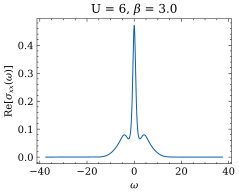

In [120]:
### Example using restructured code
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Get sigmas
sig = optical_cond.sigma(path, 'xy', ws, dws, bs=0)
sig.plot_sigma('re_sig_xx')

# cc = optical_cond.cond_calculator(path, ws, dws)
# cc.calc_sigma_xx(settings_xx={'opt_method': 'Bryan'}, bs=0)

# cc.plot_sigma('re_sig_xx')
# cc.plot_sigma('im_sig_xy')
# cc.plot_sigma('re_sig_xy')

In [121]:
cc.plot_sigma('re_sig_xy', plot_bs=True, bs_mode='asd')
cc.plot_sigma('re_sig_xy', plot_bs=True)

AttributeError: 'cond_calculator' object has no attribute 'xs'